In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [7]:
df_apts = pd.read_csv('apartment-data.csv')

In [8]:
# Number of rows, columns
df_apts.shape

(10445, 17)

In [9]:
# Getting a feel of the data
df_apts.head(3)

,fingerprint,title,description,posted_date,price,currency,partitioning,surface,building_year,floor,number_of_rooms,terrace,parking,cellar,source_website,source_offer,neighborhood
0,f312def4af9fbaa38f2c8b33e94ccac00d728791,Apartament 3 camere RIVIERA LUXURY,Descriere anuntVa oferim spre inchiriere un ap...,2019-04-28 12:33:47.528798,1000,EUR,semidecomandat,87.0,2015,3.0,3.0,True,False,False,storia,Agentie imobiliara,centru
1,6b2d1adf50ed92151652bd50ebc14ebd6f53e00b,"Apartament, 2 camere, 55 mp, parcare, pe Eugen...",Descriere anuntOferta ID: 1661Va prezentam un ...,2019-04-28 12:33:48.187126,400,EUR,semidecomandat,55.0,2010,3.0,2.0,False,True,False,storia,Agentie imobiliara,europa
2,eeeb937e2eb98bce23a3b72dea5e4e986352a35f,"Apartament, 1 camera, 39 mp, terasa, pe Calea ...",Descriere anuntOferta ID: 1043Va prezentam un ...,2019-04-28 12:33:49.447887,300,EUR,decomandat,39.0,2012,10.0,1.0,True,False,False,storia,Agentie imobiliara,calea turzii


In [10]:
df_apts.describe()

,price,surface,floor,number_of_rooms
count,10445.000000,10386.000000,8362.000000,7382.000000
mean,491.756534,58.033795,3.095312,2.211731
std,1569.911426,24.137647,2.310205,0.722419
min,42.000000,10.000000,-1.000000,1.000000
25%,370.000000,47.000000,1.000000,2.000000
50%,430.000000,55.000000,2.000000,2.000000
75%,500.000000,66.000000,4.000000,3.000000
max,89000.000000,656.000000,13.000000,5.000000


In [11]:
# We definitely have some outliers

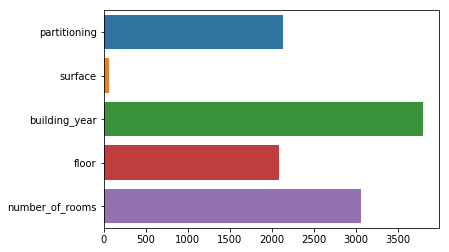

In [12]:
# Number of null values per column
df_nulls = df_apts.isnull().sum()
df_nulls = df_nulls[df_nulls > 0]
nulls_graph = sb.barplot(x=df_nulls.values, y=df_nulls.index)

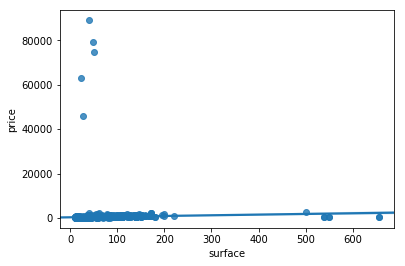

In [13]:
# Exploring the linear relationship between price and surface
linear_graph = sb.regplot(x="surface", y="price", data=df_apts)

In [14]:
# Above shows general linearity, with some outliers, namely in price
# These can be brought on by sellers wrongly marking apartments for sale as for rent
# Anything above 10,000 probably does not belong here
# Let check them out
df_apts.loc[df_apts.price > 10000]

,fingerprint,title,description,posted_date,price,currency,partitioning,surface,building_year,floor,number_of_rooms,terrace,parking,cellar,source_website,source_offer,neighborhood
717,97cf6274e599e95ed8870e4d8eee2d2ecd0d0b33,Se vinde apartament pe aleea Bizusa 48 de mp,Descriere anuntImobgaranti va propune spre van...,2019-04-28 12:49:55.050394,79000,EUR,decomandat,48.0,1990,8.0,2.0,True,True,False,storia,Agentie imobiliara,centru
913,a3d03f5cc2221c9200640dfd5df55f2e4c146a11,"Apartament in casa, 1 camera, de închiriat, în...",Descriere anuntILUSTRA IMOBILIARE inchiriază ...,2019-04-28 12:54:19.884013,89000,EUR,NaN,40.0,NaN,NaN,1.0,False,True,True,storia,Agentie imobiliara,centru
2927,318770b72464cf3a69ed1a034feaedaa56e9696c,"Apartament, 1 camera, de închiriat, în Centru",Descriere anuntILUSTRA IMOBILIARE inchiriază ...,2019-04-28 13:41:03.706166,63000,EUR,NaN,23.0,NaN,NaN,1.0,False,False,False,storia,Agentie imobiliara,centru
3382,08a547a6cefe721e5da69b20fdb12d17da89ca9a,"VG 79275, Garsoniera la et. intermediar, 24 mp...",Descriere anuntGarsoniera in zona Expo Transil...,2019-04-28 13:52:00.189373,46000,EUR,decomandat,28.0,NaN,1.0,1.0,True,False,False,storia,Agentie imobiliara,marasti
4851,67a7ad24ffe2c4f1559f0e3e595ec6a8e4e2fbdb,Se vinde apartament pe strada Bucuresti 50 de mp,Descriere anuntImobgaranti va pune spre vanzar...,2019-04-28 14:26:14.340498,74500,EUR,semidecomandat,50.0,2015,3.0,2.0,True,True,False,storia,Agentie imobiliara,centru


In [15]:
# Data needs to be cleaned of these data points
df_apts_clean_part = df_apts.loc[df_apts.price < 10000] 

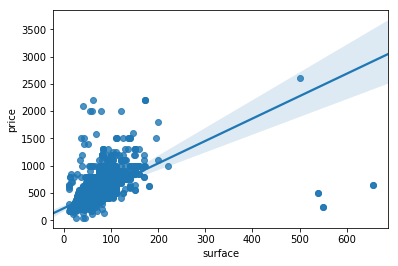

In [16]:
# Let's try the linear function again
linear_graph = sb.regplot(x="surface", y="price", data=df_apts_clean_part)

In [17]:
# Still some outliers on the surface (where do you even find a 600 m^2 apartment?)
# Let's check them out
df_apts.loc[df_apts.surface > 300]

,fingerprint,title,description,posted_date,price,currency,partitioning,surface,building_year,floor,number_of_rooms,terrace,parking,cellar,source_website,source_offer,neighborhood
1713,f798b8784a586cc7feb0cfdf10d2ae41e62984ae,For rent big apartment with 2 rooms and terrac...,Descriere anunt3-4 min walk to USAMV!Big apart...,2019-04-28 13:12:39.825909,650,EUR,decomandat,656.0,NaN,NaN,2.0,False,False,False,storia,Agentie imobiliara,not found
2186,28c3fa46d4a72dda63558cfcf4f66ac44f9bc949,"Apartament, 3 camere, 100 mp, parcare, zona st...",Descriere anuntOferta ID: 1230Va prezentam un ...,2019-04-28 13:23:36.516324,500,EUR,semidecomandat,540.0,2010,4.0,3.0,True,True,False,storia,Agentie imobiliara,buna ziua
2531,b2e62203c1ae765764ac0232f4100b337b552e8d,"Spatiu birouri, de închiriat, în Someseni",Descriere anuntILUSTRA IMOBILIARE inchiriază ...,2019-04-28 13:56:14.045835,2600,EUR,NaN,500.0,NaN,NaN,1.0,False,True,False,storia,Agentie imobiliara,someseni
4440,380c2abf651f11dc59bbf8b61d32e1cfdc00cd71,Inchiriez apartament frumos cu 2 camere+parcar...,Descriere anuntStudent Mob Cluj agentia imobil...,2019-04-28 14:17:28.367465,250,EUR,semidecomandat,550.0,NaN,NaN,2.0,False,False,False,storia,Agentie imobiliara,floresti
8299,fa7f670e7da3aae52e73bf8a94a0adde3a4c16d0,For rent big apartment with 2 rooms and terrac...,3-4 min walk to USAMV!Big apartment with 2 roo...,2019-04-23 07:06:00,650,EUR,Decomandat,656.0,NaN,NaN,NaN,False,False,False,olx,Agentie,usamv
9262,f4faf1040bea27fcb0cbe91cc316228d78888b9a,Inchiriez apartament frumos cu 2 camere+parcar...,Student Mob Cluj agentia imobiliara cu cel mai...,2019-04-24 10:37:00,250,EUR,Semidecomandat,550.0,NaN,NaN,NaN,False,False,False,olx,Agentie,floresti
9995,af37710b14e3cfceb13abef5b2b1d206a31671c5,"Apartament, 3 camere, 100 mp, parcare, zona st...",Oferta ID: 1230Va prezentam un apartament mode...,2019-04-25 15:22:00,500,EUR,Semidecomandat,540.0,Dupa 2000,4.0,NaN,True,True,False,olx,Agentie,buna ziua


In [18]:
# The only one making sense is 2531, but it's an office space so we can safely clean them all out
df_apts_clean = df_apts_clean_part.loc[df_apts_clean_part.surface < 300]

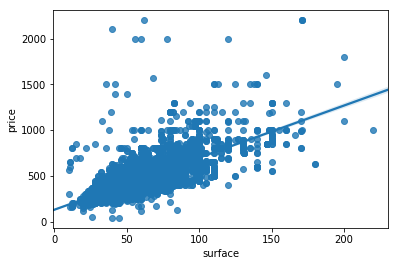

In [19]:
# Let's try the linear function AGAIN
linear_graph = sb.regplot(x="surface", y="price", data=df_apts_clean)

In [20]:
# That's better, now the linearity is observable
# Let's also check the data again
df_apts_clean.describe()

,price,surface,floor,number_of_rooms
count,10374.000000,10374.000000,8332.000000,7355.000000
mean,458.886929,57.697899,3.095895,2.211421
std,160.983629,20.092515,2.311956,0.722068
min,42.000000,10.000000,-1.000000,1.000000
25%,370.000000,47.000000,1.000000,2.000000
50%,430.000000,55.000000,2.000000,2.000000
75%,500.000000,66.000000,4.000000,3.000000
max,2200.000000,220.000000,13.000000,5.000000


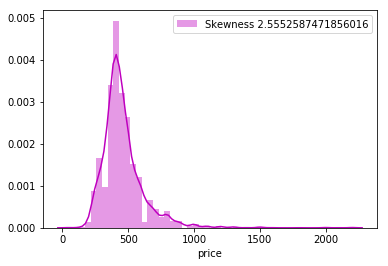

In [21]:
# Let's check out the price distribution
skew = df_apts_clean["price"].skew()
price_dist = sb.distplot(df_apts_clean["price"], color="m", label=f"Skewness {skew}")
price_dist = price_dist.legend(loc="best")

In [22]:
# Explanation: the skew means where the tail of the distribution is
# if it's negative, more values in the higher part, positive, then more values in the lower part
# conclusion: the skew is high, because we still have some extreme values wich might impact the skew

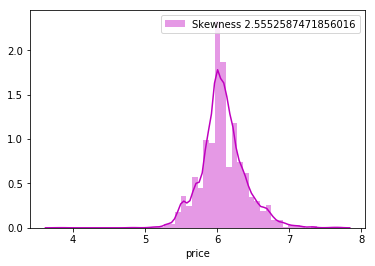

In [23]:
# We apply a normalization procedure (logarithm of price) to minimise the impact of extreme values
price_log = df_apts_clean["price"].map(lambda i: np.log1p(i) if i > 0 else 0)
price_log.skew()
price_log_dist = sb.distplot(price_log, color="m", label=f"Skewness {skew}")
price_log_dist = price_log_dist.legend(loc="best")

In [24]:
# Way better skew, which shows that the apartment prices are near symmetric respective to their size
# but still slightly cheaper than they are expensive

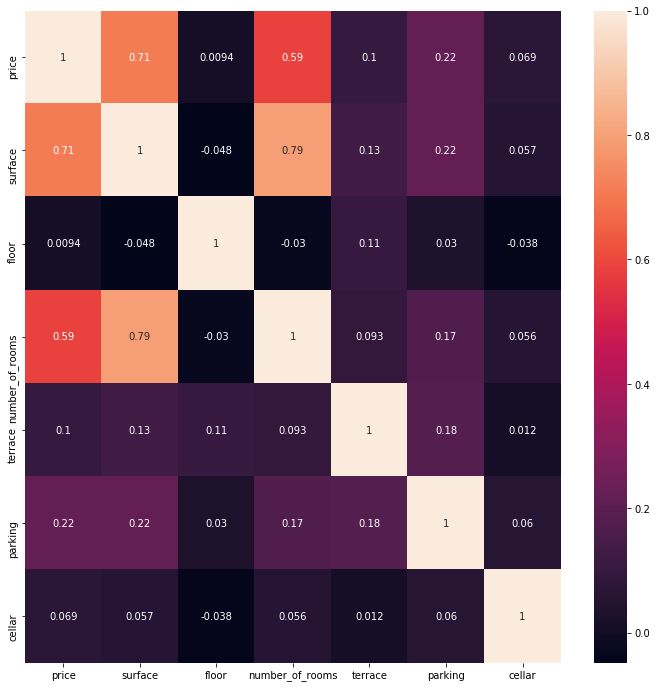

In [25]:
# Pearson Correlations
plt.figure(figsize=(12,12))
heatmap = sb.heatmap(df_apts_clean.corr(), annot=True)

In [26]:
# Explanation
# Obvious correlation in increase between price & surface, price & number of rooms, number of rooms & surface (of course, more rooms, more space)
# A price increase correlates the most with a parking spot, followed by a terrace and only slightly with a cellar
# There's a slightly better chance to get parking with a larger apartment (both in surface & number of rooms)

In [27]:
# Apartments by neighborhood
df_known_area = df_apts_clean[df_apts_clean.neighborhood != 'not found']
df_known_area['neighborhood'].value_counts()

zorilor              1067
gheorgheni           1018
marasti               983
centru                869
buna ziua             835
gara                  805
iulius                688
manastur              548
grigorescu            452
andrei muresanu       258
viteazu               218
ultracentral          200
borhanci              156
plopilor              153
iris                  146
intre lacuri          126
europa                116
dorobantilor          102
calea turzii           95
floresti               61
sigma                  45
titulescu              43
interservisan          43
gruia                  42
horea                  42
baciu                  38
dambul rotund          38
piata unirii           31
the office             28
sopor                  28
vivo                   26
usamv                  26
expo transilvania      23
someseni               17
cipariu                14
muzeului               10
motilor                10
polus                   4
becas       

In [28]:
# Most seem to be in Zorilor, Gheorgheni & Marasti
# Due to data collecting, some are duplicated (e.g vivo & polus)
# They should be grouped together
import warnings
warnings.filterwarnings('ignore')

df_groups = df_known_area.copy()
df_groups.neighborhood = df_known_area.neighborhood.replace({
    'calea turzii': 'andrei muresanu',
    'sigma': 'zorilor',
    'cipariu':'centru',
    'motilor':'centru', 
    'muzeului':'centru', 
    'piata unirii':'centru', 
    'viteazu': 'centru', 
    'ultracentral': 'centru',
    'the office': 'marasti',
    'the office': 'dorobantilor',
    'usamv': 'manastur',
    'polus': 'vivo',
    'interservisan': 'gheorgheni', 
    'titulescu': 'gheorgheni', 
    'iulius': 'gheorgheni',
    'expo transilvania':'intre lacuri',
})

In [29]:
# Let's see the average price per area, no grouping
df_known_area.groupby('neighborhood').mean().sort_values(by='price', ascending=False)['price']

neighborhood
becas                750.000000
andrei muresanu      573.178295
cipariu              553.571429
ultracentral         550.940000
piata unirii         547.903226
muzeului             533.000000
europa               515.086207
plopilor             511.816993
viteazu              504.151376
gara                 499.351553
centru               497.545455
titulescu            494.139535
faget                485.000000
interservisan        479.441860
buna ziua            475.802395
iulius               474.449128
dorobantilor         472.450980
sigma                471.377778
gruia                468.690476
intre lacuri         466.103175
borhanci             462.423077
sopor                462.107143
the office           461.892857
zorilor              450.874414
usamv                447.423077
horea                443.095238
marasti              434.800610
gheorgheni           434.430255
grigorescu           422.196903
calea turzii         406.894737
vivo                 398.07

In [30]:
# The most expensive apartments are apparently in Becas, in Cipariu and Ultracentral ones.
# I would dismiss Becas & Cipariu due to the low amount of data
# Funny fact, people who used Polus for the mall area instead of Vivo (new name) tend to put lower price

In [31]:
# Let's see the average price per area, with grouping
df_groups.groupby('neighborhood').mean().sort_values(by='price', ascending=False)['price']

neighborhood
becas              750.000000
andrei muresanu    528.427762
europa             515.086207
plopilor           511.816993
centru             507.577663
gara               499.351553
faget              485.000000
buna ziua          475.802395
dorobantilor       470.176923
gruia              468.690476
borhanci           462.423077
sopor              462.107143
gheorgheni         452.307478
zorilor            451.704137
intre lacuri       445.429530
horea              443.095238
marasti            434.800610
grigorescu         422.196903
vivo               386.666667
manastur           379.130662
dambul rotund      371.026316
someseni           347.058824
iris               338.958904
baciu              322.894737
floresti           320.737705
Name: price, dtype: float64

In [32]:
# Becas remains the most expensive by far, but it's not very relevant
# I'd say the most expensive would be Andrei Muresanu, Europa & Plopilor, while the least expensive are Floresti, Baciu and Iris

In [33]:
# How many apartment by room count
df_apts_clean.groupby('number_of_rooms').size()

number_of_rooms
1.0     958
2.0    4210
3.0    1881
4.0     286
5.0      20
dtype: int64

In [34]:
# Apartment with missing number of rooms
df_rooms_miss = df_apts_clean[df_apts_clean['number_of_rooms'].isnull()]
df_rooms_miss.shape

(3019, 17)

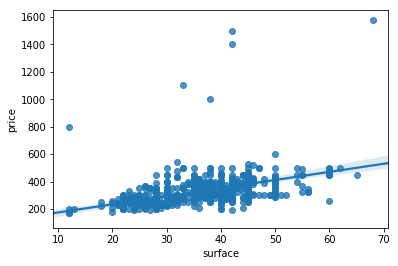

In [35]:
df_1room = df_apts_clean[df_apts_clean.number_of_rooms == 1]
df_2room = df_apts_clean[df_apts_clean.number_of_rooms == 2]
df_3room = df_apts_clean[df_apts_clean.number_of_rooms == 3]
df_4room = df_apts_clean[df_apts_clean.number_of_rooms == 4]
df_5room = df_apts_clean[df_apts_clean.number_of_rooms == 5]
# 1 room price vs surface distribution
sb.regplot(x="surface", y="price", data=df_1room)


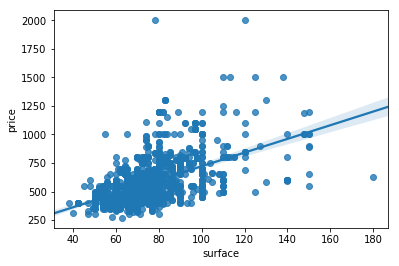

In [36]:
# 3 room price vs surface distribution
sb.regplot(x="surface", y="price", data=df_3room)


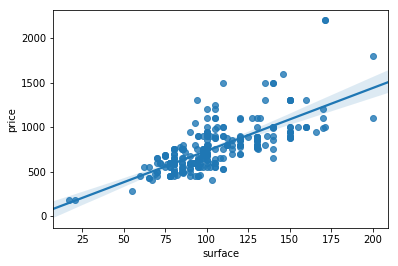

In [37]:
# 4 rooms price vs surface distribution
sb.regplot(x="surface", y="price", data=df_4room)


In [38]:
# Some outliers can be noticed on this one
# Some people advertise only 1 room for rent out of 4, causing this imbalance

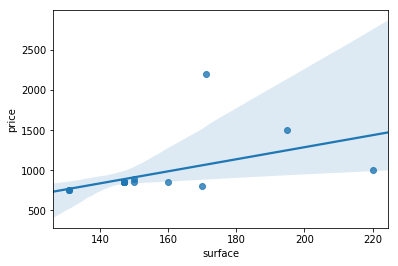

In [39]:
# 5 rooms price vs surface distribution
sb.regplot(x="surface", y="price", data=df_5room)


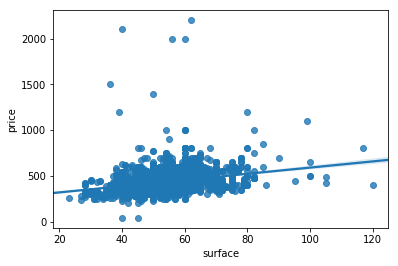

In [40]:
# Kept aside the 2 rooms ones (basically the ones of most interest)
# 2 rooms price vs surface distribution
sb.regplot(x="surface", y="price", data=df_2room)

In [41]:
df_2room = df_2room[df_2room.currency == 'EUR']
df_2room.describe()

,price,surface,floor,number_of_rooms
count,4209.000000,4209.000000,3460.000000,4209.0
mean,434.028748,53.628178,3.119942,2.0
std,104.556386,8.603998,2.295163,0.0
min,42.000000,23.000000,-1.000000,2.0
25%,380.000000,50.000000,1.000000,2.0
50%,420.000000,54.000000,2.000000,2.0
75%,470.000000,58.000000,4.000000,2.0
max,2200.000000,120.000000,13.000000,2.0


In [42]:
# The average price for a 2-room apartment is 434
# Average size is 53 sqm
# Let's see how many are there per area
# Apply same cleaning as for the general one
df_2room_known = df_2room[df_2room.neighborhood != 'not found']
df_2room_grouped = df_2room_known.copy()
df_2room_grouped.neighborhood = df_2room_grouped.neighborhood.replace({
    'calea turzii': 'andrei muresanu',
    'sigma': 'zorilor',
    'cipariu':'centru',
    'motilor':'centru', 
    'muzeului':'centru', 
    'piata unirii':'centru', 
    'viteazu': 'centru', 
    'ultracentral': 'centru',
    'the office': 'marasti',
    'the office': 'dorobantilor',
    'usamv': 'manastur',
    'polus': 'vivo',
    'interservisan': 'gheorgheni', 
    'titulescu': 'gheorgheni', 
    'iulius': 'gheorgheni',
    'expo transilvania':'intre lacuri',
})
df_2room_grouped['neighborhood'].value_counts()

gheorgheni         762
centru             580
buna ziua          435
zorilor            395
marasti            373
gara               344
manastur           213
grigorescu         203
andrei muresanu    129
plopilor            75
borhanci            56
iris                54
intre lacuri        53
europa              47
dorobantilor        47
horea               20
floresti            18
gruia               18
baciu               17
dambul rotund       12
sopor                8
vivo                 7
someseni             4
Name: neighborhood, dtype: int64

In [43]:
df_2room_grouped.groupby('neighborhood').mean().sort_values(by='price', ascending=False)['price']

neighborhood
plopilor           493.466667
centru             482.168966
gruia              468.666667
sopor              467.500000
gara               466.261628
buna ziua          438.321839
horea              437.250000
europa             437.021277
gheorgheni         435.220472
dorobantilor       431.340426
marasti            429.136729
andrei muresanu    428.480620
zorilor            416.415190
intre lacuri       415.622642
borhanci           413.178571
grigorescu         390.699507
manastur           368.258216
dambul rotund      368.250000
vivo               366.428571
someseni           360.000000
iris               341.944444
floresti           328.333333
baciu              314.705882
Name: price, dtype: float64

In [44]:
# Most desirable apartments have all the amenities: parking, cellar and terrace
df_all_amenities = df_2room_grouped[(df_2room_grouped.terrace == True) & (df_2room_grouped.parking == True) & (df_2room_grouped.cellar == True)]
df_all_amenities.describe()

,price,surface,floor,number_of_rooms
count,35.000000,35.000000,29.000000,35.0
mean,507.114286,57.457143,2.724138,2.0
std,130.342258,8.321987,1.729916,0.0
min,350.000000,46.000000,1.000000,2.0
25%,400.000000,50.500000,1.000000,2.0
50%,450.000000,55.000000,3.000000,2.0
75%,550.000000,60.000000,4.000000,2.0
max,800.000000,80.000000,8.000000,2.0


In [45]:
df_all_amenities.groupby('neighborhood').size()

neighborhood
andrei muresanu    1
borhanci           1
buna ziua          5
centru             3
dorobantilor       1
gara               9
gheorgheni         4
grigorescu         4
intre lacuri       1
manastur           1
marasti            3
zorilor            2
dtype: int64

In [46]:
pd.set_option('max_colwidth', 1000)
df_all_amenities[['title', 'price', 'currency', 'surface', 'floor', 'neighborhood']]

,title,price,currency,surface,floor,neighborhood
164,"Apartament ultrafinisat, living+dormitor, 70mp, 2 parcari, zona FSEGA",649,EUR,70.0,6.0,gheorgheni
516,"Apartament Gruia,60 mp,superfinisat,garaj,gradina-270 mp",680,EUR,60.0,NaN,gara
540,Apartament 2 camere de inchiriat zona Marasti,400,EUR,79.0,4.0,marasti
565,"Inchiriere apartament de 2 camere, zona Gheorgheni",430,EUR,56.0,4.0,gheorgheni
991,"Apartament in bloc nou, 2 camere,aproape de Iulius Mall, Gheorgheni.",400,EUR,80.0,4.0,gheorgheni
1052,"Apartament 2 camere, Buna Ziua",450,EUR,50.0,1.0,buna ziua
1065,Apartament cu 2 camere in Marasti,400,EUR,68.0,4.0,marasti
1238,"IA2 78858, Apartament modern, 2 camere, 48 mp utili, Buna Ziua",500,EUR,48.0,1.0,buna ziua
1254,"Apartament Gruia superfinisat,garaj,terasa,60 mp,prima inchiriere",800,EUR,60.0,1.0,gara
1309,"Apartament Gruia,60 mp,superfinisat,garaj,gradina-270 mp",750,EUR,60.0,NaN,gara


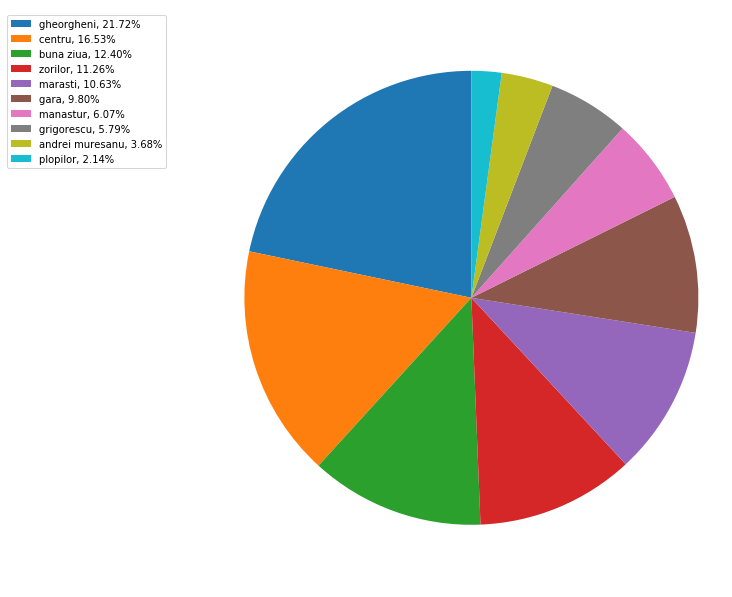

In [119]:
sizes = list(
    df_2room_grouped.groupby('neighborhood').count().sort_values(by='neighborhood')['fingerprint']
)
labels = sorted(df_2room_grouped['neighborhood'].unique())
sizes, labels = list(zip(*sorted(zip(sizes, labels))))
sizes, labels = sizes[::-1][:10], labels[::-1][:10]
fig1, ax1 = plt.subplots(figsize=(10, 8))
fig1.subplots_adjust(0.3, 0, 1, 1)

_, _ = ax1.pie(sizes, startangle=90)
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %.2f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()